In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
data = pd.read_csv("C:\\Users\\jayan\\Downloads\\38833FF26BA1D.UnigramPreview_g9c9v27vpyspw!App\\yield_df.csv")

In [6]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
data.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [8]:
data = data.drop(data.columns[0], axis=1)

In [9]:
data.shape

(28242, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [11]:
data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [12]:
print(data.isnull().sum())

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [13]:
data.duplicated().sum()

2310

In [14]:
for i in data.select_dtypes(include="object").columns:
  print(data[i].value_counts())
  print()

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64



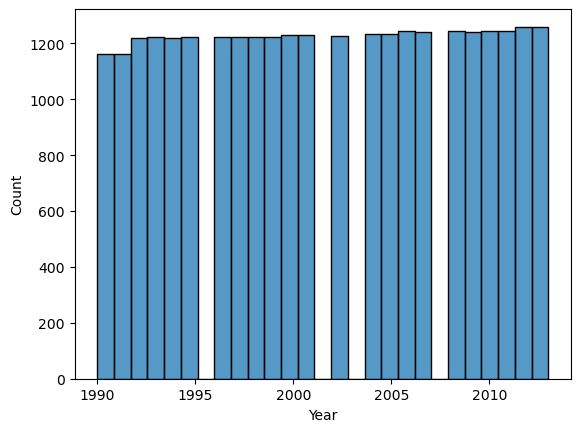

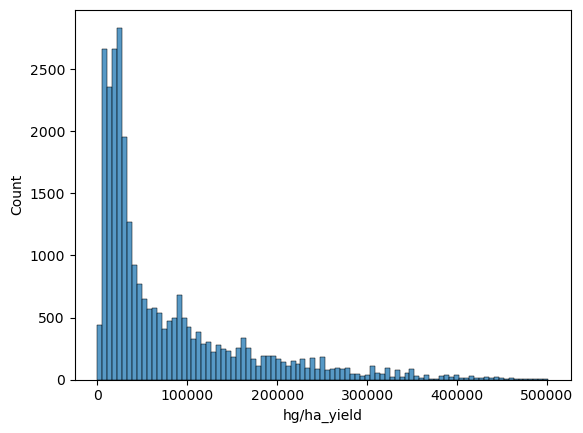

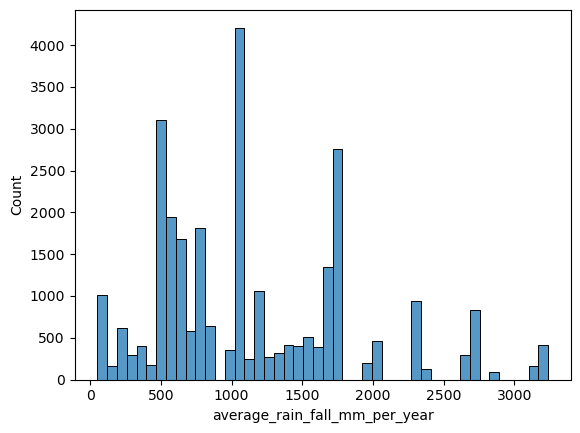

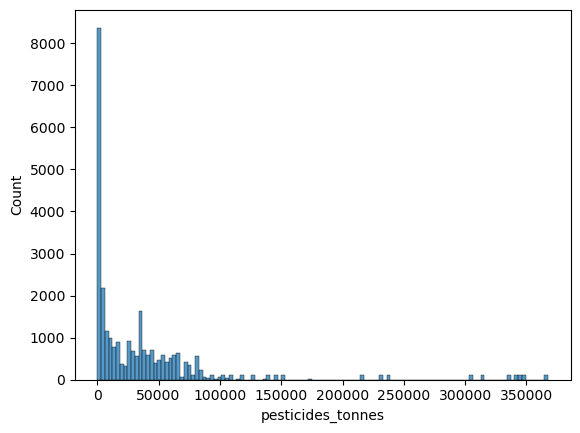

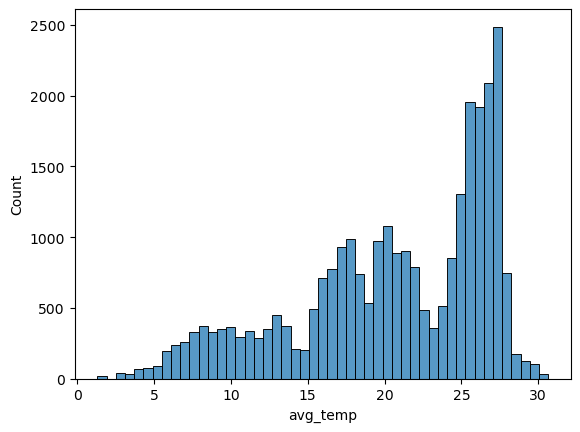

In [15]:
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
  sns.histplot(data=data,x=i)
  plt.show()

In [16]:
data.select_dtypes(include="number").columns

Index(['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

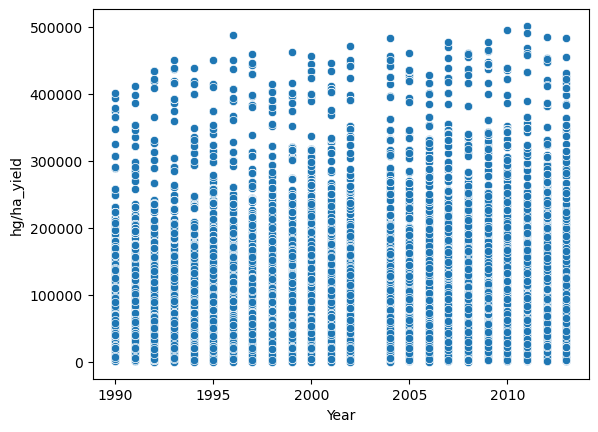

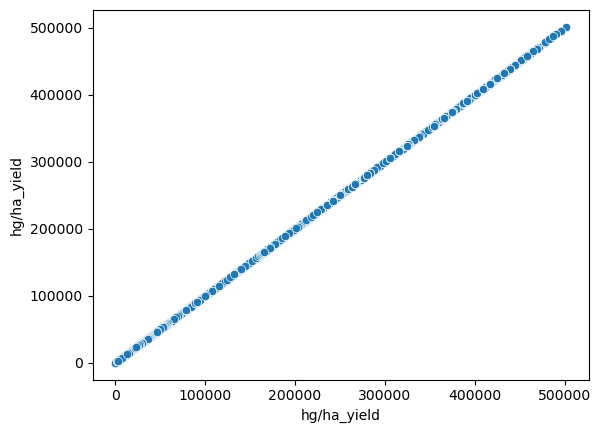

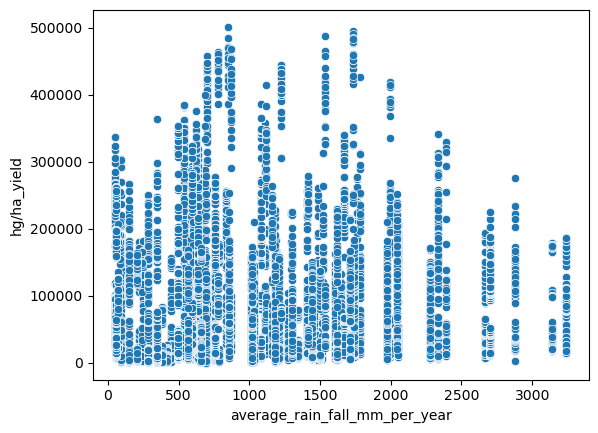

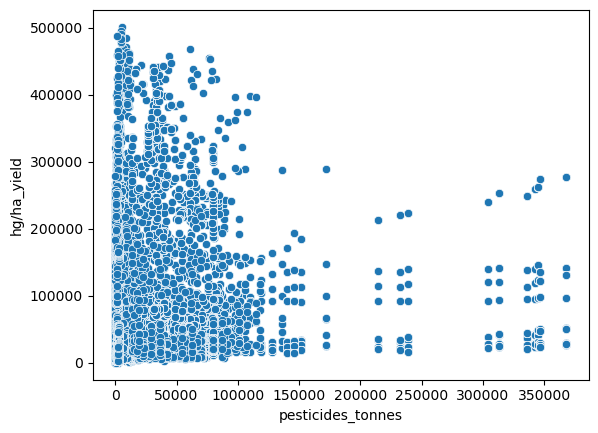

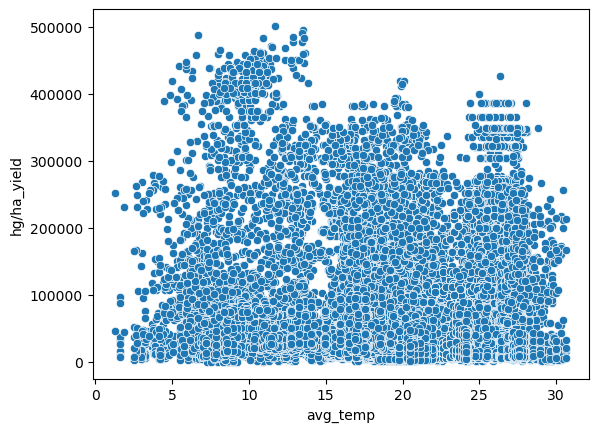

In [17]:
for i in ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp']:
  sns.scatterplot(data=data,x=i,y="hg/ha_yield")
  plt.show()

In [18]:
data['yield'] = data['hg/ha_yield']
data.drop('hg/ha_yield',axis=1,inplace=True)

In [19]:
data.head(2)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667


Text(0, 0.5, 'yield')

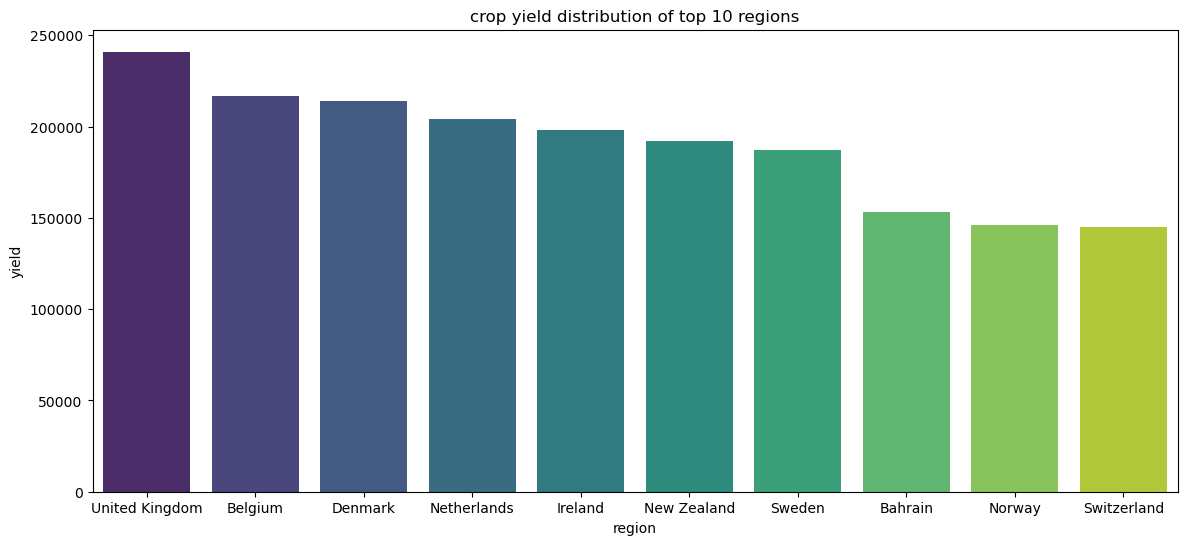

In [20]:
yield_top_10_region = data.groupby('Area')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_region.index, y=yield_top_10_region.values,palette='viridis')
plt.title('crop yield distribution of top 10 regions')
plt.xlabel('region')
plt.ylabel('yield')

Text(0, 0.5, 'yield')

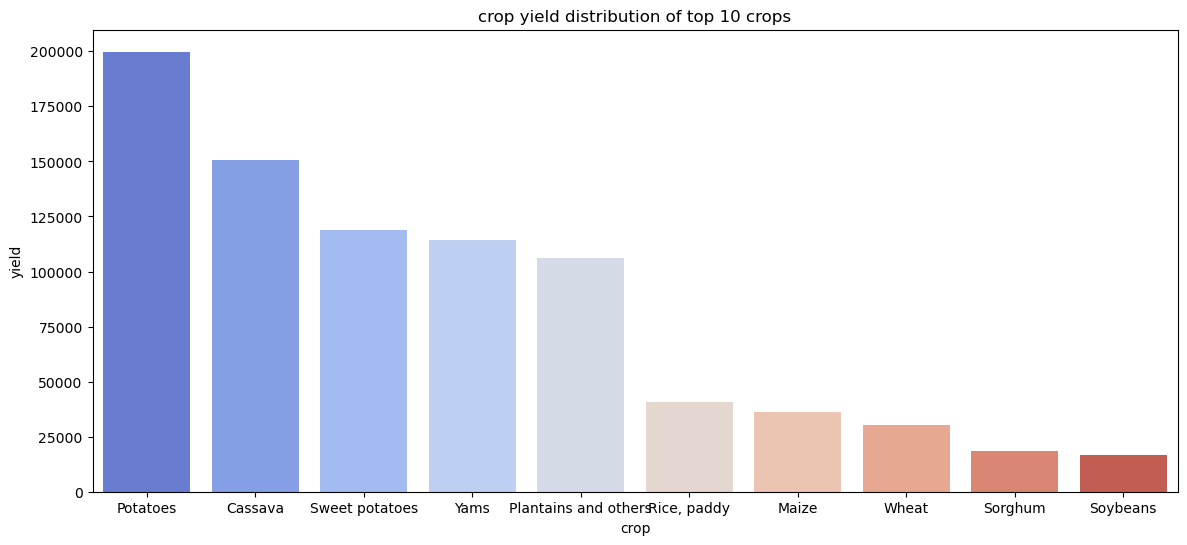

In [21]:
yield_top_10_crops = data.groupby('Item')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_crops.index,y=yield_top_10_crops.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 crops')
plt.xlabel('crop')
plt.ylabel('yield')

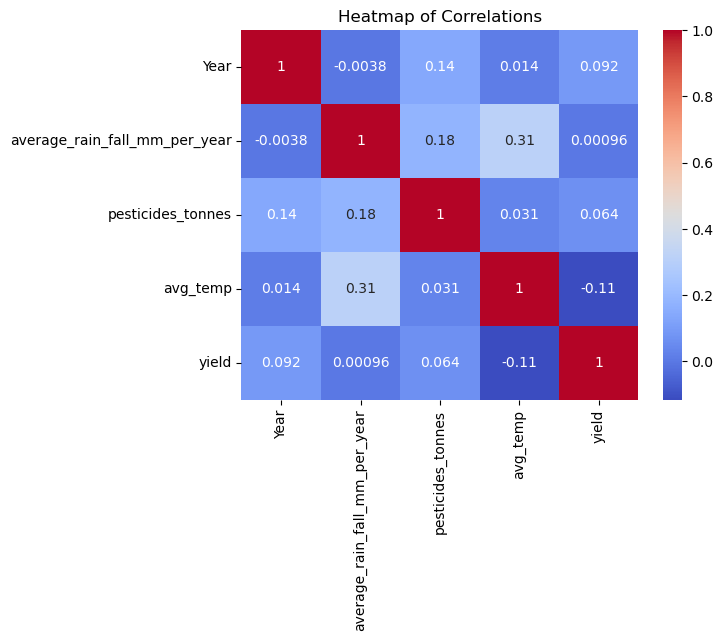

In [22]:
corr = data.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

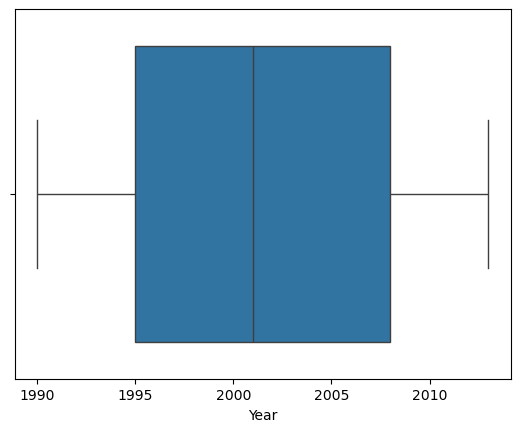

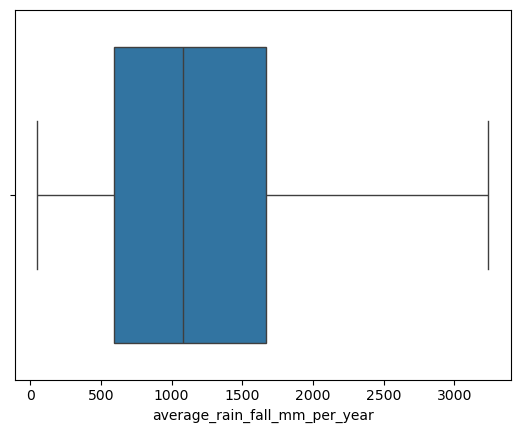

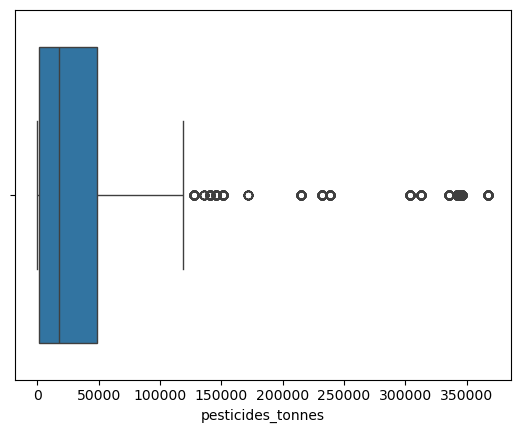

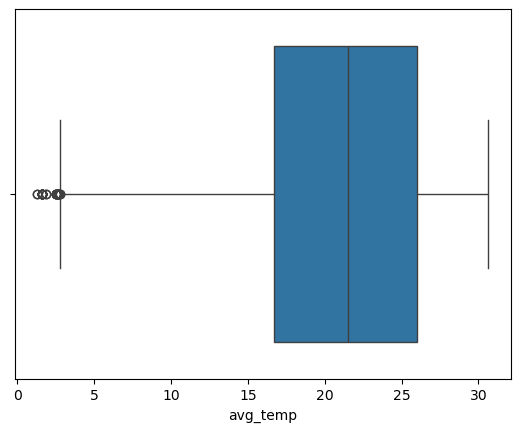

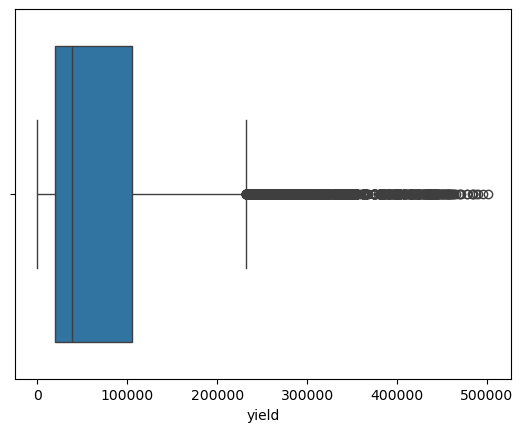

In [23]:
import warnings
warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

In [24]:
data.columns

Index(['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'yield'],
      dtype='object')

In [54]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [56]:
for i in ['pesticides_tonnes', 'avg_temp', 'yield']:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

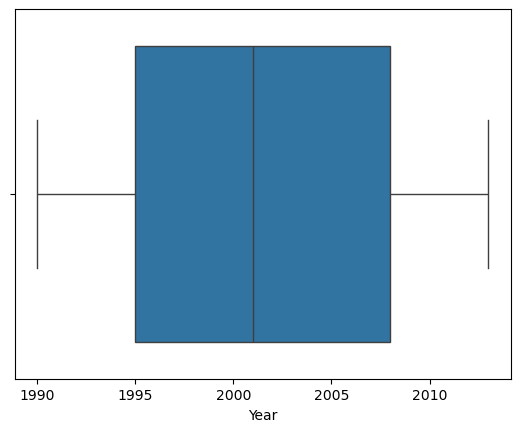

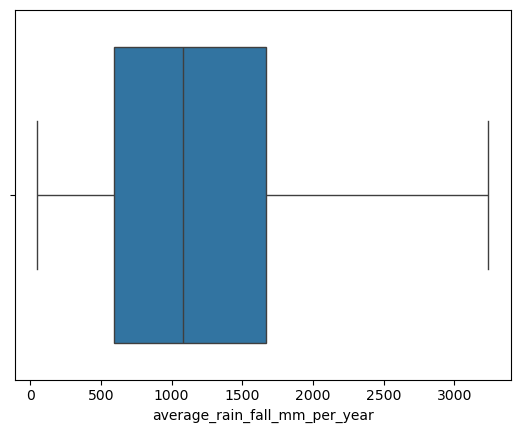

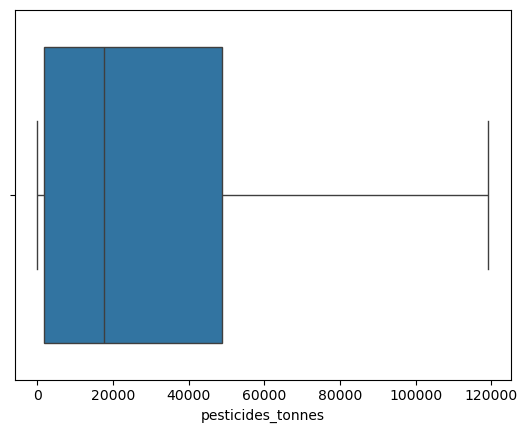

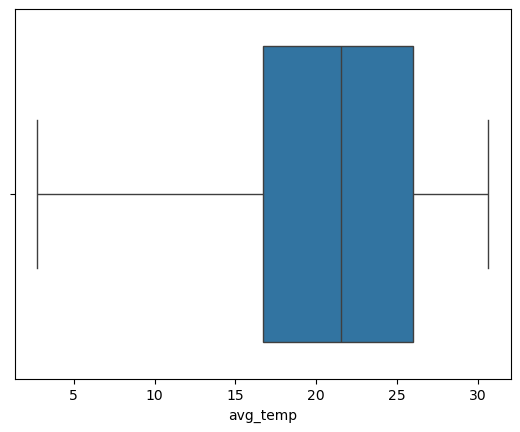

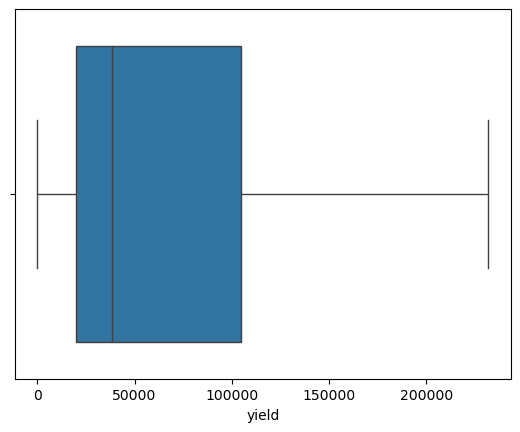

In [58]:
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [60]:
# Rename columns for clarity
data_new = data.rename(columns={
        "average_rain_fall_mm_per_year": "Rainfall",
        "pesticides_tonnes": "Pesticides",
        "avg_temp": "Avg_Temp"
 })


In [62]:
data_new.head(2)

,Area,Item,Year,Rainfall,Pesticides,Avg_Temp,yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613.0
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667.0


In [64]:
 # Encode categorical variables
 #Making modification to account for cateogrical variables to better process in the alg
country = LabelEncoder()
crop = LabelEncoder()
data_new['Country_Encoded'] = country.fit_transform(data_new['Area'])
data_new['Crop_Encoded'] = crop.fit_transform(data_new['Item'])

In [66]:
 # Define features and target variable
 x = data_new[['Country_Encoded', 'Crop_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
 y = data_new['yield']

In [68]:
 from sklearn.model_selection import train_test_split
# Split data into training and testing sets
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
data_new.columns

Index(['Area', 'Item', 'Year', 'Rainfall', 'Pesticides', 'Avg_Temp', 'yield',
       'Country_Encoded', 'Crop_Encoded'],
      dtype='object')

In [72]:
print("Shapes of training data:")
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nShapes of testing data:")
print("X_test:", x_test.shape)
print("y_test:", y_test.shape)

Shapes of training data:
X_train: (22593, 5)
y_train: (22593,)

Shapes of testing data:
X_test: (5649, 5)
y_test: (5649,)


In [74]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
#Machine Learning algorithm
 #Random Forest 
treemodel = RandomForestRegressor(random_state=42)
treemodel.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
treemodel.predict(x_test)

array([ 71075.65,  23738.9 ,  52264.16, ..., 231813.  ,  24857.79,
        24041.77])

In [78]:
treemodel.score(x_test,y_test)

0.971616442160547